# Capstone 2 - Data Wrangling
* Notebook by Adam Lang, Springboard Data Science Fellow
* Date: 5/27/2024

# Background
* Two-dimensional (2D) ultrasound imaging is the gold standard for prenatal screening and fetal monitoring as it is low cost, non-invasive, real-time, and has no radiation hazards. The fetal head circumference (HC) can monitor fetal growth, estimate gestational age, and predict delivery methods for pregnant women. Therefore, fetal HC is one of the most important biological characteristics in prenatal ultrasounds. In current clinical practice, fetal HC measurements are performed manually by Sonographers which is not convenient, time-consuming, and heavily dependent on human skill and experience. However, an accurate measure of the fetal HC is not possible without precise detection of the fetal skull boundary which is often difficult in 2D ultrasound due to numerous imaging factors; all of which can lead to incomplete and incorrect detection of the fetal skull boundary and false measurements (Yang et al, 2022). It is also well known that the manual biometric measurements of the fetal head vary significantly by inter- and intra-observer variability and thus the concept of having a more accurate standard measuring system such as a computer vision algorithm could reduce the amount of time and variability because it would not be subject to intra-observer variability (van den Heuvel, 2018).
* Furthermore, in medically underserved areas of the U.S. and across the world, Medical Sonographers are not always available which is why companies like Google Health are leading the way in developing algorithms for ultrasound detection and measurement of the fetal head (BBC News, 2024). In addition, Ultimately, refining image detection algorithms for fetal ultrasound can help everyone involved in prenatal care whether they live in a big city or a rural underserved region. It is well known that 99% of maternal deaths worldwide occur in developing countries and enhancing the prenatal care before, during and after childbirth can and will save lives of countless women and newborns (van den Heuvel, 2018).
* In addition, ultrasound images are obtained following the same protocols in a repeatable way. Images should be acquired in a **specific plane to be useful for diagnosis, to decrease the inter- and intra-observer variability and to allow the measurement of specific structures**. Typically, more than 20 images are acquired for each ultrasound examination within mid-trimester screening ultrasound8. Occasionally, three dimensional (3D) images and videos can also be acquired to complete the clinical examination (Burgos-Artizzu et al. 2020).
* A fetal specialist will review the sonographers images and select those containing the anatomical structures of interest. Usually, trained research technicians, followed by a validation from a senior maternal-fetal expert, manually perform this task.
  * However, since each ultrasound examination usually contains more than 20 images (some hospitals almost as much as 60 at a time), this process is often slow, cumbersome and prone to errors.
  * This is why a well known landmark study looked at using computer vision neural networks like CNNs to detect the fetal plane to hopefully automate this task and reduce manual error (Burgos-Artizzu et al. 2020).

# Goals of the Project
* The original goal of this project was to utilize a dataset of 1,334 2D ultrasound images (999 training, 335 test) to perform standard deep learning computer vision tasks in object recognition: Image classification (fetal head vs. other), Image Classification Class Label for Gestation Age (GA): 1st trimester, 2nd trimester, 3rd trimester (although these measures are also closely related to the object segmentation task), Object detection (fetal head present), Object localization (skull boundary), and Object segmentation (fetal head measurements). The most basic level of success would be to have a positive prediction on each task mentioned.
* **However, the original dataset mentioned above with 1,334 2D images, is task specific for object segmentation of fetal head measurements. The dataset only contains labels of the predicted measurements of the fetal head circumference and it would be difficult to perform simple tasks such as object detection and classification using this dataset. Since object segmentation is one of the more difficult tasks in computer vision, I am going to start with a dataset that is more ideal for image classification. This dataset was published by Burgos-Artizzu et al. in 2020.**
  * It contains routinely acquired maternal-fetal screening ultrasound images collected from 2 different hospitals by several technicians and ultrasound devices.
  * All images were manually labeled by an expert maternal fetal clinicians.
  * **Images are divided into 6 classes**:
    * 4 of the most widely used fetal anatomical planes:
      * 1. Abdomen
      * 2. Brain
      * 3. Femur
      * 4. Thorax
    * In addition to these classes:
      * 5. Motherss cervix (widely used for prematurity screening) and
      * 6. A general category to include less common image planes.
    * Fetal brain images were further categorized into the 3 most common fetal brain planes:
      * 1. Trans-thalamic
      * 2. Trans-cerebellum
      * 3. Trans-ventricular
  * Metadata including patient number, us machine, device operator are also provided, as well as the train-test split used in the original paper.




Why is this imbalance an issue or constraint? It was shown in the original study that produced this dataset, “that it is important to separate the results for each trimester, because the uncertainty of the estimated gestational age (GA) increases with GA due to the natural variation in fetal size increases with GA (van den Heuval, 2018).” It is also well known that the GA can be estimated more accurately in the first trimester, but the fetal skull is not clearly visible in the first trimester, which makes automated detection of the fetal head circumference (HC) and segmentation measurement a more challenging task (van den Heuval, 2018).  The fetal skull is also very soft in the first trimester, and does not always appear brighter than the inside of the fetal head. Therefore, it is often very difficult to detect the edge of the fetal head, especially when it lies close to the wall of the uterus (van der Heuval, 2018). This means that the pixel size increases from 1st to 2nd to 3rd trimesters. The pixel size differences will be a constraint to simple detection of the fetal head, let alone trying to measure the segmentation of the head circumference. Thus to deal with this we should consider the different algorithms available to handle these constraints: U-NET, YOLO and CNN’s (all types).



# Data Source
The dataset information used for this Data Wrangling and Image Classification modeling is found here:
1. **Dataset source**: https://zenodo.org/records/3904280
2. **Github with additional datset info:** https://github.com/Yulv-git/Awesome-Ultrasound-Standard-Plane-Detection/tree/main
3. Original paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7311420/
  * Citation: Burgos-Artizzu XP, Coronado-Gutiérrez D, Valenzuela-Alcaraz B, Bonet-Carne E, Eixarch E, Crispi F, Gratacós E. Evaluation of deep convolutional neural networks for automatic classification of common maternal fetal ultrasound planes. Sci Rep. 2020 Jun 23;10(1):10200. doi: 10.1038/s41598-020-67076-5.

# Data Wrangling Process
* There are guidelines we need to follow for this notebook based on the Springboard Data Science Fellowship, as well as the general guidelines that are well known for working with image data in Python and PyTorch.
* The Basic Process we will follow:

1. Get the dataset(s)
* We will use the `wget` command to get the datsets from github.

2. Organize the images into a working directory
* This will assign the train and test splits and the class labels.

2b. We can also look at the excel or csv files which have the labels and just get some general info on this data even though we are not going to be using it for anything other than labeling our images.
* We can also explore this further in the next notebook EDA.

3. Visualize some Images
* We should visualize a set of images to verify we can read in the image files and view them.
* Also look at metadata of images.



4. Transform Data
* To work with image data we need to transform the data into PyTorch tensors.
* We will need to consolidate the image shapes for it to eventually be able to fit into a machine learning/deep learning model.

5. Data Definitions
* We should get an overview of:
	* Test and Train data directories
	* Class names used for prediction tasks
	* Length and shape of dataset
	* Samples of the datasets
	* Targets for prediction and labels
	* Data types
	* Classes
	* etc...


6. Turn loaded images into DataLoader's
* This is important so we can iterate and load the data into BATCH_SIZEs for EDA and later pre-processing.
* If needed we can perform "data cleaning" during this stage.

**Note next step is not going to be done in this notebook**
7. DICOM metadata
* This is an important step in medical image processing.
* However, we will look at the specific image metadata in the **next notebook which will be devoted specifically to Exploratory Data Analysis (EDA).**


# 0. Import PyTorch and set up device agnostic code

In [1]:
## import libraries
import torch
from torch import nn

## check the torch version
torch.__version__

'2.3.0+cu121'

We have Pytorch version 2.3.0 and cu121

In [2]:
## let's setup device agnostic code -- important step in PyTorch workflow
device = "cuda" if torch.cuda.is_available() else "cpu"
#print device
device

'cpu'

Right now only cpu is available but we could run a GPU in google colab if needed, however not necessary for this first notebook as we won't be doing any modeling tasks.

In [3]:
## we can check the gpu we have available though with this line
#!nvidia-smi

# 1. Get the data!
* We will first get the data using `wget` call to github.




In [23]:
import os
import requests
import zipfile
from pathlib import Path
import pandas as pd
import shutil
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "FETAL_PLANES_ZENODO"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download
    with open(data_path / "FETAL_PLANES_ZENODO.zip", "wb") as f:
        request = requests.get('https://zenodo.org/record/3904280/files/FETAL_PLANES_ZENODO.zip?download=1')
        print("Downloading FETAL_PLANES_ZENODO data...")
        f.write(request.content)  # write content of request to file

    # Unzip the FETAL_PLANES_ZENODO data -- extracting all contents to image_path
    with zipfile.ZipFile(data_path / "FETAL_PLANES_ZENODO.zip", "r") as zip_ref:
        print("Unzipping FETAL_PLANES_ZENODO data...")
        zip_ref.extractall(image_path)

data/FETAL_PLANES_ZENODO directory already exists... skipping download


# 2. Create an organized image file directory

* The issue is if we choose to use the CustomDataSet class for handling multiple labels, we do not need to use the PyTorch ImageFolder class because ImageFolder is designed for simpler use cases where each image is associated with a **single label** based on its directory structure. The PyTorch CustomDataSet allows for more complex scenarios such as handling multiple labels
  * However, if we still wanted to leverage the organized directory structure created for ImageFolder while maintaining the ability to handle multiple labels, we would not be directly using the ImageFolder class. Instead, we would organize the data in a way that mimics what ImageFolder expects but then use the custom dataset class to load and transform the data accordingly.

Here's how you we will try to set up the code structure:

1. Organize Images by Class:
  * organize images into class-labeled directories.

2. Create a Custom Dataset Class:
  * This will allow us to handle the multiple label classification of the imaging data.

In [24]:
# Function to organize images by class
def organize_images_by_class(imgs_info, imgs_dir, x_col="Image_name", y_cols=["Plane", "Brain_plane"], seed=1, target_w=256, target_h=256):
    # Read the Excel file
    df = pd.read_excel(imgs_info, index_col=0, engine='openpyxl')
    df["Image_name"] = df.index
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'Train ': 'Train'}, inplace=True)

    # Adjust Image_name column to reflect correct paths in the Images folder
    df["Image_name"] = df["Image_name"].apply(lambda x: str(Path(imgs_dir) / "Images" / (x + ".png")))

    # Check if files with different extensions exist
    extensions = ['.png', '.jpg', '.jpeg']

    # Strip whitespace from class labels
    df["Plane"] = df["Plane"].str.strip()
    df["Brain_plane"] = df["Brain_plane"].str.strip()

    # Create directories for train and test sets directly under imgs_dir
    train_dir = Path(imgs_dir) / 'train_dir'
    test_dir = Path(imgs_dir) / 'test_dir'

    try:
        train_dir.mkdir(parents=True, exist_ok=True)
        test_dir.mkdir(parents=True, exist_ok=True)
        print(f"Created directories: {train_dir}, {test_dir}")
    except Exception as e:
        print(f"Error creating directories: {e}")

    # Create directories for each class
    plane_classes = df[y_cols[0]].unique()
    brain_plane_classes = df[y_cols[1]].unique()

    for cls in plane_classes:
        try:
            (train_dir / cls).mkdir(parents=True, exist_ok=True)
            (test_dir / cls).mkdir(parents=True, exist_ok=True)
        except Exception as e:
            print(f"Error creating class directory for {cls}: {e}")

    for cls in brain_plane_classes:
        try:
            (train_dir / cls).mkdir(parents=True, exist_ok=True)
            (test_dir / cls).mkdir(parents=True, exist_ok=True)
        except Exception as e:
            print(f"Error creating brain_plane directory for {cls}: {e}")

    # Split the DataFrame into train and test sets
    df_train = df[df["Train"] == 1].reset_index(drop=True)
    df_test = df[df["Train"] == 0].reset_index(drop=True)

    # Copy images to respective directories based on Plane and Brain_plane labels - this will move the images to their labeled directories
    for _, row in df_train.iterrows():
        image_base_path = Path(row["Image_name"])
        plane_label = row["Plane"]
        brain_plane_label = row["Brain_plane"]
        # Check if any file with the allowed extensions exists
        found = False
        for ext in extensions:
            image_path = image_base_path.with_suffix(ext)
            if image_path.exists():
                try:
                    shutil.copy(image_path, train_dir / plane_label / image_path.name)
                    shutil.copy(image_path, train_dir / brain_plane_label / image_path.name)
                    found = True
                    break
                except Exception as e:
                    print(f"Error copying {image_path} to {train_dir / plane_label}: {e}")
        if not found:
            print(f"Image file not found for {image_base_path} with any of extensions: {extensions}")

    for _, row in df_test.iterrows():
        image_base_path = Path(row["Image_name"])
        plane_label = row["Plane"]
        brain_plane_label = row["Brain_plane"]
        # Check if any file with the allowed extensions exists
        found = False
        for ext in extensions:
            image_path = image_base_path.with_suffix(ext)
            if image_path.exists():
                try:
                    shutil.copy(image_path, test_dir / plane_label / image_path.name)
                    shutil.copy(image_path, test_dir / brain_plane_label / image_path.name)
                    found = True
                    break
                except Exception as e:
                    print(f"Error copying {image_path} to {test_dir / plane_label}: {e}")
        if not found:
            print(f"Image file not found for {image_base_path} with any of extensions: {extensions}")

    print("Images have been organized by class.")

# Call the function with the appropriate arguments
path_to_labels = '/content/data/FETAL_PLANES_ZENODO/FETAL_PLANES_DB_data.xlsx'
organize_images_by_class(path_to_labels, str(image_path))


Created directories: data/FETAL_PLANES_ZENODO/train_dir, data/FETAL_PLANES_ZENODO/test_dir
Images have been organized by class.


### Now we will create a custom PyTorch Dataset class

In [25]:
import os
from typing import Tuple, List
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pathlib

class CustomDataSet(Dataset):
    def __init__(self, targ_dir: str, transform=None):
        self.targ_dir = pathlib.Path(targ_dir)
        self.transform = transform

        # Get all image paths
        self.paths = list(self.targ_dir.glob("*/*.png"))

        # Create class attributes
        self.classes = sorted(set(p.parent.name for p in self.paths))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

    def load_image(self, index: int) -> Image.Image:
        return Image.open(self.paths[index])

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[Image.Image, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            img = self.transform(img)

        return img, class_idx

#### Let's look at some of the dataset directories we created.

In [26]:
import os

## function to iterate through the image data directories
def walk_through_dir(dir_path):
  """Iterates through dir_paths returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [27]:
## look at image directories now
walk_through_dir(image_path)

There are 3 directories and 3 images in 'data/FETAL_PLANES_ZENODO'
There are 10 directories and 0 images in 'data/FETAL_PLANES_ZENODO/test_dir'
There are 0 directories and 1678 images in 'data/FETAL_PLANES_ZENODO/test_dir/Other'
There are 0 directories and 645 images in 'data/FETAL_PLANES_ZENODO/test_dir/Maternal cervix'
There are 0 directories and 660 images in 'data/FETAL_PLANES_ZENODO/test_dir/Fetal thorax'
There are 0 directories and 1472 images in 'data/FETAL_PLANES_ZENODO/test_dir/Fetal brain'
There are 0 directories and 339 images in 'data/FETAL_PLANES_ZENODO/test_dir/Trans-cerebellum'
There are 0 directories and 358 images in 'data/FETAL_PLANES_ZENODO/test_dir/Fetal abdomen'
There are 0 directories and 524 images in 'data/FETAL_PLANES_ZENODO/test_dir/Fetal femur'
There are 0 directories and 3799 images in 'data/FETAL_PLANES_ZENODO/test_dir/Not A Brain'
There are 0 directories and 765 images in 'data/FETAL_PLANES_ZENODO/test_dir/Trans-thalamic'
There are 0 directories and 302 im

Great we can see the image directories we created.

In [28]:
## setup the train and test directory paths
# Define the paths to the train and test directories
train_dir = image_path / 'train_dir'
test_dir = image_path / 'test_dir'

# print train and test dirs
train_dir, test_dir

(PosixPath('data/FETAL_PLANES_ZENODO/train_dir'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir'))

## 2b. Take a look at the tabular dataset
* The dataset comes with a csv and excel file (both are the same) with the image labels.
* We can take a brief look at this data here.

In [29]:
import pandas as pd

## load the data into a dataframe
df_excel = pd.read_excel('/content/data/FETAL_PLANES_ZENODO/FETAL_PLANES_DB_data.xlsx')

# head
df_excel.head()

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1


In [30]:
## info on the data
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_name   12400 non-null  object
 1   Patient_num  12400 non-null  int64 
 2   Plane        12400 non-null  object
 3   Brain_plane  12400 non-null  object
 4   Operator     12400 non-null  object
 5   US_Machine   12400 non-null  object
 6   Train        12400 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 678.2+ KB


In [31]:
## check for null values
df_excel.isna().sum()

Image_name     0
Patient_num    0
Plane          0
Brain_plane    0
Operator       0
US_Machine     0
Train          0
dtype: int64

In [32]:
## check dtypes
df_excel.dtypes

Image_name     object
Patient_num     int64
Plane          object
Brain_plane    object
Operator       object
US_Machine     object
Train           int64
dtype: object

In [33]:
## columns
df_excel.columns

Index(['Image_name', 'Patient_num', 'Plane', 'Brain_plane', 'Operator',
       'US_Machine', 'Train '],
      dtype='object')

In [34]:
## lets look at the Train column value_counts()
df_excel['Train '].value_counts()

Train 
1    7129
0    5271
Name: count, dtype: int64

Based on the metadata we have from the dataset source, we know that 1 is Train and 0 is test.

In [35]:
## lets calculate the number of train and test images based off this
7129 + 5271

12400

In [36]:
## Let's calculate the % of the train and test data
train_count = 7129
test_count = 5217
total_count = 12400
train_percentage = (train_count / total_count) * 100
test_percentage = (test_count / total_count) * 100

print(f"The percent of train data is: {train_percentage:.2f}%")
print('\n')
print(f"The percent of test data is: {test_percentage:.2f}%")

The percent of train data is: 57.49%


The percent of test data is: 42.07%


In [37]:
## we can see the value_counts of some columns of importance: Plane
df_excel['Plane'].value_counts().sort_values(ascending=False)

Plane
Other              4213
Fetal brain        3092
Fetal thorax       1718
Maternal cervix    1626
Fetal femur        1040
Fetal abdomen       711
Name: count, dtype: int64

Observations:
* It appears the class label "Other" dominates the dataset, followed closely by "Fetal Brain".
* The "Fetal Abdomen" class has the least amount of images.
* We can explore this further in the next EDA notebook, but with image augmentation we can perhaps augment the fact that there is class imbalance. We also have to be aware that the model we build in future notebooks could overfit the data and predict "Other or "Fetal Brain" simply due to class imbalance. Something to think about during the next steps in EDA and pre-processing.

In [38]:
## we can see the value_counts of the Brain_plane
df_excel['Brain_plane'].value_counts()

Brain_plane
Not A Brain          9308
Trans-thalamic       1638
Trans-cerebellum      714
Trans-ventricular     597
Other                 143
Name: count, dtype: int64

Observations
* Interestingly enough, there are more "Brain_plane" class members for "Not A Brain" than for actual planes of the brain.
* Again this is something we may have to explore further with image data augmentation in the pre-processing steps to building our model.
* This certainly could overfit the model to predict "Not A Brain" rather than a plane of the brain.

# 3. Visualize an Image
* Here we will get all of the image paths, we will use glob to do this. The glob module, which is short for "global", is a function that's used to search for files that match a specific file pattern or name.
* We will pick a random image path using Python's random.choice() function.
* Then obtain the image class name using pathlib.Path.parent.stem
* Since we're working with images, we will open the image with Python's PIL (pillow) library
docs: https://pillow.readthedocs.io/en/stable/
* Finally we will show the image and print the metadata.

In [39]:
## first reminder of what image_path is
image_path

PosixPath('data/FETAL_PLANES_ZENODO')

Great! We can see random images in the image_path directory

In [68]:
import random
from PIL import Image

# set seed
#random.seed(42)

# 1. Get all image paths - glob (global path) -- or a "glob" of images
## */*/* will unpack anything in directory path
image_path_list = list(image_path.glob("*/*/*"))
image_path_list

[PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01509_Plane1_8_of_13.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01423_Plane1_2_of_2.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01409_Plane1_10_of_27.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01347_Plane1_7_of_24.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01444_Plane3_7_of_7.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01365_Plane1_7_of_17.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01348_Plane1_4_of_8.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01252_Plane1_8_of_17.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01535_Plane1_12_of_21.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01521_Plane1_1_of_1.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir/Other/Patient01606_Plane1_18_of_18.png'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_di

In [69]:
# 2. pick a random image_path
random_image_path = random.choice(image_path_list)
#print random image path
print(random_image_path)

data/FETAL_PLANES_ZENODO/test_dir/Not A Brain/Patient01747_Plane5_1_of_1.png


In [70]:
# 3. Get an image class from path name (image class is name of directory where image is stored)
image_class = random_image_path.parent.stem

print(image_class)

Not A Brain


Random image path: data/FETAL_PLANES_ZENODO/test_dir/Not A Brain/Patient01747_Plane5_1_of_1.png
Image class: Not A Brain
Image height: 661
Image width: 959


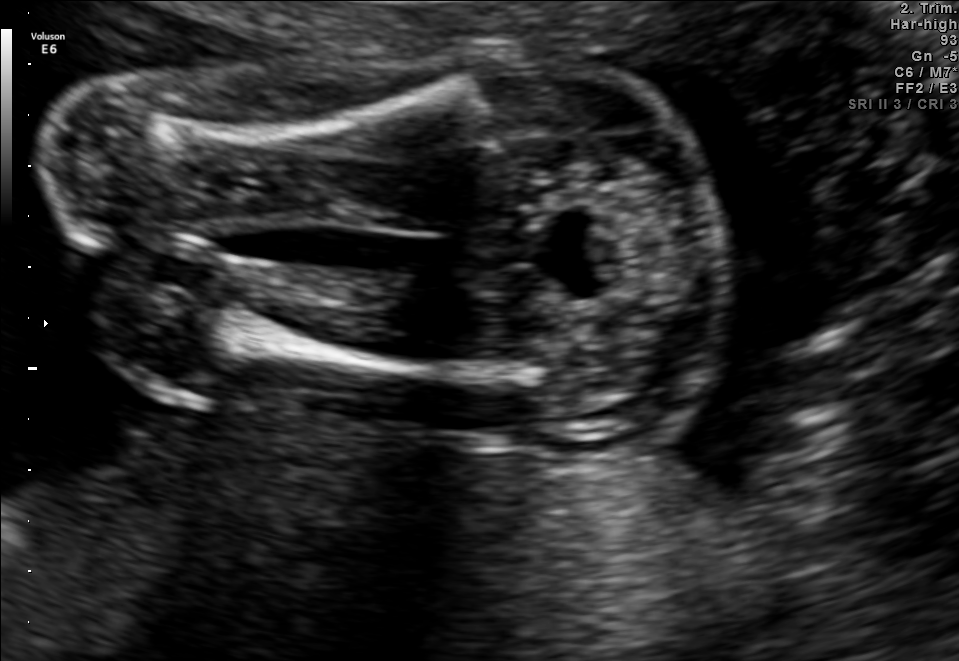

In [71]:
# 4. Open the image -- can use PyTorch but we will use PIL
img = Image.open(random_image_path)

# 5. Print image metadata with the image
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
# output img
img

## Plot an image with matplotlib

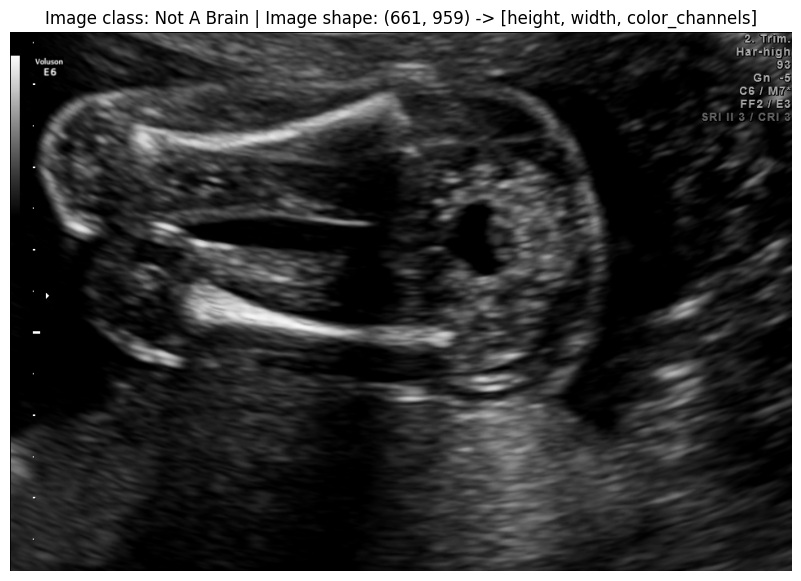

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# first step - turn image into array
img_as_array = np.array(img)

# plot an image with matplotlib
plt.figure(figsize=(12,7))
plt.imshow(img_as_array, cmap='gray')
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False); #turn off image axis

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 41, 50, 60],
       [ 0,  0,  0, ..., 55, 63, 68],
       ...,
       [ 0, 40, 39, ..., 43, 42, 39],
       [ 0, 38, 41, ..., 43, 40, 38],
       [ 0, 36, 38, ..., 43, 41, 38]], dtype=uint8)
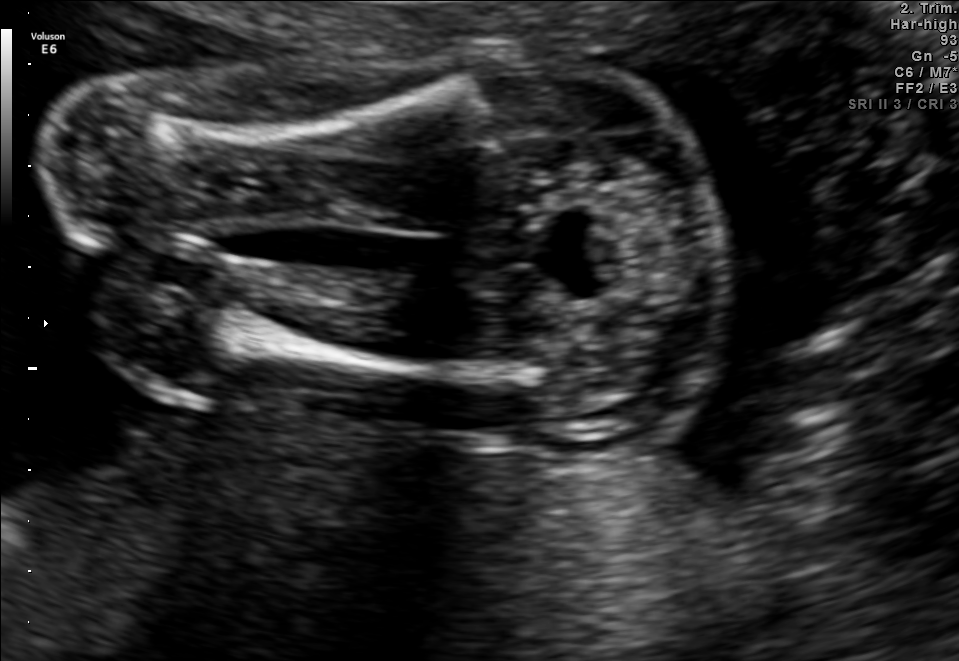

In [73]:
# another image
img_as_array

# 4. Transforming Data
* Before we can use our image data with PyTorch we need to:
1. Turn target data into tensors (in our case, numerical representation of our images)
2. Turn data into a `torch.utils.data`.Dataset and subsequently a torch.utils.data.DataLoader, we'll call these Dataset and DataLoader.

In [74]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

* We will turn the images from `.png` into tensors

You can do this a couple of ways:

1. `nn.Sequential()` - "scripting" the transforms - turning into a Python script.
2.`transforms.Compose` - Composes several transforms together. This transform does not support torchscript.

* Ultimately, transforms help you get your images ready to be used with a model/perform data augmentation.
* Then we would move the transformed data into a PyTorch DataLoader

In [75]:
## Write a transform for an image
data_transform = transforms.Compose([
    # resize images to 64x64 - computer vision size
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal (data augmentation) - probability of 0.5 (50% of time flip horizontal)
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()

])

# 5. Data Definitions
* We will get the general information about the dataset now.
* We can immediately see below that we have our data in tensors in a standard PyTorch `float32` format.

In [76]:
#dtypes
data_transform(img).dtype

torch.float32

## Build function to plot transformed images

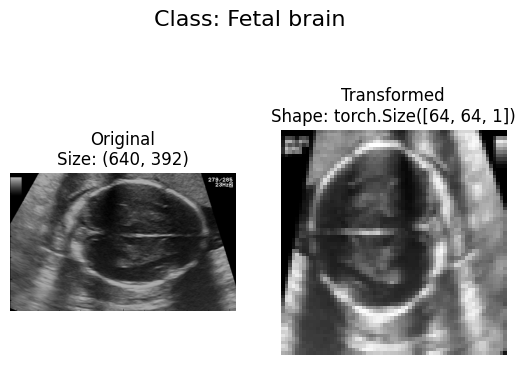

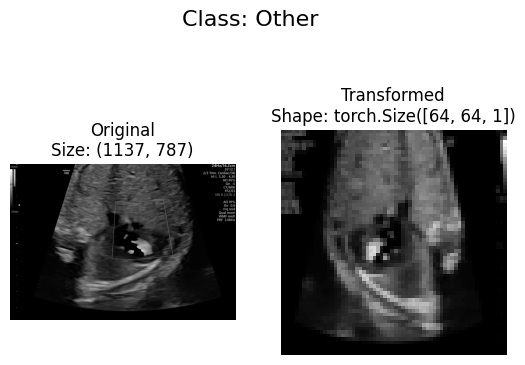

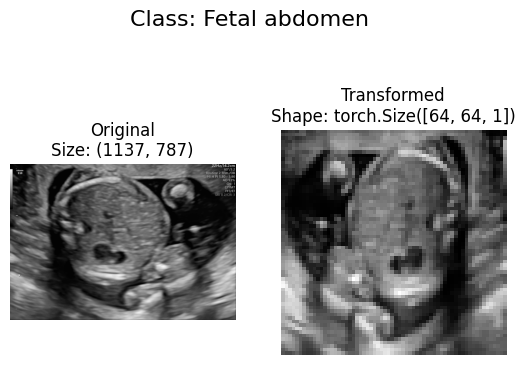

In [77]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=42):
  """
  Selects random images from a path of images and
  loads/transforms them then plots the original vs. the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  # loop through randomly sampled image_paths
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      #plot original image
      ax[0].imshow(f,cmap='gray')
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      # permute will change axis - color channels from first --> last
      # Changing default order from (C,H,W) --> (H,W,C)
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib - matplotlib prefers color channels last!
      ax[1].imshow(transformed_image,cmap='gray')
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


# plot transformed images with function
# transform will = data_transform (above)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)# or 42 if no randomness

Observations of what we just did:
* We condensed the image size to 64,64 pixels.
* This "pixelates" the image.
* Thus, less information is encoded in a 64x64 image.
* Now a Model can compute faster on smaller size image but we may lose some of the detailed information (trade off).
* We can utilize some other pixelation condensing techniques, but this is usually standard.

In [78]:
## lets see the train_dir and test_dir
train_dir, test_dir

(PosixPath('data/FETAL_PLANES_ZENODO/train_dir'),
 PosixPath('data/FETAL_PLANES_ZENODO/test_dir'))

In [79]:
import os # for file systems
import pathlib # file paths
import torch

from PIL import Image # open images
from torch.utils.data import Dataset # base Dataset class from Torch
from torchvision import transforms #transform images to tensors
from typing import Tuple, Dict, List # type hinting

In [81]:
# setup path for target directory
target_directory = '/content/data/FETAL_PLANES_ZENODO/train_dir'
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

Target dir: /content/data/FETAL_PLANES_ZENODO/train_dir


In [82]:
list(os.scandir(target_directory))

[<DirEntry 'Other'>,
 <DirEntry 'Maternal cervix'>,
 <DirEntry 'Fetal thorax'>,
 <DirEntry 'Fetal brain'>,
 <DirEntry 'Trans-cerebellum'>,
 <DirEntry 'Fetal abdomen'>,
 <DirEntry 'Fetal femur'>,
 <DirEntry 'Not A Brain'>,
 <DirEntry 'Trans-thalamic'>,
 <DirEntry 'Trans-ventricular'>]

In [83]:
## turn this into a function
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  ## map a class name to an integer
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}



  return classes, class_to_idx

In [84]:
find_classes(target_directory)

(['Fetal abdomen',
  'Fetal brain',
  'Fetal femur',
  'Fetal thorax',
  'Maternal cervix',
  'Not A Brain',
  'Other',
  'Trans-cerebellum',
  'Trans-thalamic',
  'Trans-ventricular'],
 {'Fetal abdomen': 0,
  'Fetal brain': 1,
  'Fetal femur': 2,
  'Fetal thorax': 3,
  'Maternal cervix': 4,
  'Not A Brain': 5,
  'Other': 6,
  'Trans-cerebellum': 7,
  'Trans-thalamic': 8,
  'Trans-ventricular': 9})

In [85]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                        transforms.Resize(size=(256,256)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                        transforms.Resize(size=(256,256)),
                                        transforms.ToTensor()

])

In [90]:
# directories
imgs_dir = '/content/data/FETAL_PLANES_ZENODO'

In [91]:
# Test out ImageFolderCustom
train_data_custom = CustomDataSet(os.path.join(imgs_dir,'train_dir'),
                                       transform=train_transforms)

test_data_custom = CustomDataSet(os.path.join(imgs_dir,'test_dir'),
                                     transform=test_transforms)

In [92]:
## view train and test data
train_data_custom, test_data_custom

(<__main__.CustomDataSet at 0x78be2b431b10>,
 <__main__.CustomDataSet at 0x78bf918714e0>)

In [93]:
## len of train and test data
len(train_data_custom)

14258

In [94]:
# len of test_data
len(test_data_custom)

10542

In [95]:
# classes
train_data_custom.classes

['Fetal abdomen',
 'Fetal brain',
 'Fetal femur',
 'Fetal thorax',
 'Maternal cervix',
 'Not A Brain',
 'Other',
 'Trans-cerebellum',
 'Trans-thalamic',
 'Trans-ventricular']

In [96]:
# classes to idx
train_data_custom.class_to_idx

{'Fetal abdomen': 0,
 'Fetal brain': 1,
 'Fetal femur': 2,
 'Fetal thorax': 3,
 'Maternal cervix': 4,
 'Not A Brain': 5,
 'Other': 6,
 'Trans-cerebellum': 7,
 'Trans-thalamic': 8,
 'Trans-ventricular': 9}

In [97]:
## Display random images
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False # turn off display shape
    print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust,cmap='gray')
    plt.axis("off")
    plt.tight_layout(pad=5.0)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)


In [98]:
## class_names
class_names = train_data_custom.classes

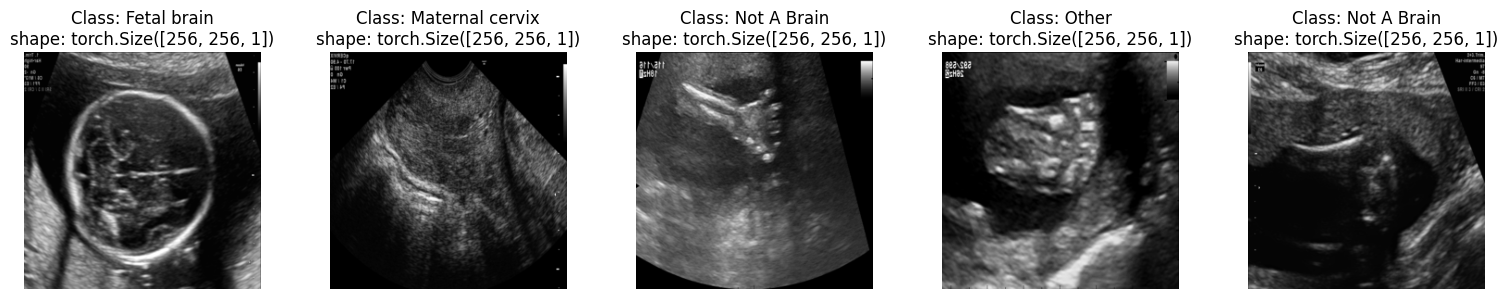

In [99]:
## display random images
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

# 6. DataLoaders
* This is the last step in Data Wrangling before Exploratory Data Analysis.
* The DataLoader is a PyTorch class that allows us to efficiently store our data and also iterate over it before we train a model.

In [100]:
from torch.utils.data import DataLoader
BATCH_SIZE = 64 # multiples of 8
NUM_WORKERS=1
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x78be27500250>,
 <torch.utils.data.dataloader.DataLoader at 0x78be2b467520>)

In [101]:
# get an image and a label from the custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# print shapes
img_custom.shape, label_custom.shape

(torch.Size([64, 1, 256, 256]), torch.Size([64]))

# Summary
* We have completed the "Data Wrangling" phase for now.
* In the next notebook we will go into Exploratory Data Analysis (EDA) and learn more about the images, tensors and pixelation.
* In the 3rd notebook we will go into futher pre-processing of the dataset such as Data Augmentation which will allow us to augment the data into different positions and shapes to train the deep learning model.
* Lastly, in the 4th notebook we will train computer vision models for multi-class classification on our fetal ultrasound data to attempt to classify what the image is.
* It should be noted that if we have more time we may use the other dataset this project originally intended to use which was to perform image segmentation on fetal head circumference, but starting with the most simple computer vision task of object detection and classification is easier hence why we chose this dataset to start.

# References
* ACOG, 2024. “Ultrasound Exams.” Accessed on 4/24/2024. Retrieved from: https://www.acog.org/womens-health/faqs/ultrasound-exams
* Ashkani Chenarlogh V, Ghelich Oghli M, Shabanzadeh A, et al. Fast and Accurate U-Net Model for Fetal Ultrasound Image Segmentation. Ultrasonic Imaging. 2022;44(1):25-38. doi:10.1177/01617346211069882
* BBC News, 2024. How AI could ‘save lives’ of pregnant women in Kenya. Link: https://www.youtube.com/watch?v=IZA-5cg3_WI
* Burgos-Artizzu XP, Coronado-Gutiérrez D, Valenzuela-Alcaraz B, Bonet-Carne E, Eixarch E, Crispi F, Gratacós E. Evaluation of deep convolutional neural networks for automatic classification of common maternal fetal ultrasound planes. Sci Rep. 2020 Jun 23;10(1):10200. doi: 10.1038/s41598-020-67076-5.
* G. Wang, X. Luo, R. Gu, S. Yang, Y. Qu, S. Zhai, Q. Zhao, K. Li, S. Zhang. (2023). PyMIC: A deep learning toolkit for annotation-efficient medical image segmentation. Computer Methods and Programs in Biomedicine (CMPB). February 2023, 107398. Github: https://github.com/HiLab-git/PyMIC
* Hoque, 2024. “How to Evaluate An Image Classification Model.” Accessed on 4/24/2024. Retrieved from: https://docs.clarifai.com/tutorials/how-to-evaluate-an-image-classification-model
* Kim ET, Singh K, Moran A, Armbruster D, Kozuki N. Obstetric ultrasound use in low and middle income countries: a narrative review. Reprod Health. 2018 Jul 20;15(1):129. doi: 10.1186/s12978-018-0571-y.
* Machine Learning Mastery – Object Recognition with Deep Learning: https://machinelearningmastery.com/object-recognition-with-deep-learning/
* Thomas L. A. van den Heuvel, Dagmar de Bruijn, Chris L. de Korte and Bram van Ginneken. Automated measurement of fetal head circumference using 2D ultrasound images. PloS one, 13.8 (2018): e0200412.
* Thomas L. A. van den Heuvel, Dagmar de Bruijn, Chris L. de Korte and Bram van Ginneken. Automated measurement of fetal head circumference using 2D ultrasound images [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1322001
* V. Nagabotu and A. Namburu, Precise segmentation of fetal head in ultrasound images using improved U-Net model, ETRI Journal (2023), 1–12, DOI 10.4218/etrij.2023-0057.
* Yang et al, 2022. “A new approach to automatic measure fetal head circumference in ultrasound images using convolutional neural networks.” Computers in Biology and Medicine. Link: https://www.sciencedirect.com/science/article/abs/pii/S0010482522005674?via%3Dihub
